FIAP - Tecnólogo em Inteligência Artificial

# Checkpoint 04

Faça o exercício abaixo <font color="red">individualmente</font>, para praticar o uso do `sklearn` em Machine Learning. Utilize os conceitos vistos em aula, e consulte [documentações](https://scikit-learn.org/stable/) na internet. Em caso de dúvidas, contate o Prof. Michel. 

**Entrega**: 18/setembro/2022, via Teams.


## Apresentação do trabalho

Neste checkpoint vamos trabalhar com modelagem de dados em bases de dimensionalidade reduzida em relação à base original. 

Para isso, você deve: 

- Utilizar a base de câncer de mama que vimos na aula de PCA
- Ler/carregar/montar o dataset original
- Dividir DADOS  e LABELS
- Dividir TREINO e TESTE 
- Padronizar os dados 
- Reduzir a dimensionalidade com PCA 
- Sobre o dataset reduzido (componentes principais), aplicar o modelo de *Regressão Logística* para consturir o classificador
- Escolha outros **2 modelos** de classificação para avaliar a performance no mesmo conjunto de dados
- Calcular os resultados e comentar brevemente seus achados


*Desafio!*: faça o código modularizado para avaliar os efeitos da redução de dimensionalidade para N componentes diferentes, avaliando o efeito da classificação com números distintos de componentes principais 



**Critérios de avaliação**: A correção do checkpoint será feita mediante os seguintes critérios:
- qualidade da compreensão e exploração da base
- formas de padronizar os dados selecionados
- completute de atendimento ao pipeline de machine learning
- emprego correto dos conceitos vistos em sala de aula (uso do dataset, métricas, etc)
- análise/justificativas dos resultados


In [1]:
#baixar base breast & imports necessarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import re

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression as LR   #modelo sugerido pelo professor
from sklearn.svm import SVC                                 #modelo adicional escolhido 
from sklearn.neighbors import KNeighborsClassifier as KNN   #modelo adicional escolhido

from sklearn import tree                                    #modelo de teste para pipeline
from sklearn.neighbors import NearestCentroid               #modelo de teste para pipeline

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn import metrics

from personalizer import GraphCustomizer as gc

from sklearn.datasets import load_breast_cancer

import warnings
warnings.filterwarnings('ignore')

In [2]:
breast = load_breast_cancer()
breast_data = breast.data
breast_labels = breast.target

print(f"Data Shape: {breast_data.shape}, Labels Shape: {breast_labels.shape}")

Data Shape: (569, 30), Labels Shape: (569,)


In [3]:
breast_labels = np.reshape(breast_labels, (569, 1))

print(f"Data Shape: {breast_data.shape}, Labels Shape: {breast_labels.shape}")

Data Shape: (569, 30), Labels Shape: (569, 1)


In [4]:
final = np.concatenate(
    [breast_data, breast_labels],
    axis = 1
)

print(f"Final Data Shape: {final.shape}")

Final Data Shape: (569, 31)


In [5]:
colunas = list(breast.feature_names)
colunas.append("label")

df = pd.DataFrame(final, columns = colunas)

#explorando dados

In [6]:
df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0.0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0.0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0.0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0.0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0.0


In [7]:
df.tail(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
559,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,0.06570,...,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732,1.0
560,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,...,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321,1.0
561,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,0.05502,...,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905,1.0
562,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,0.2128,0.07152,...,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090,0.0
563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,...,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.25420,0.2929,0.09873,0.0
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400,0.0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039,1.0


In [8]:
df.sample(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
449,21.10,20.52,138.10,1384.0,0.09684,0.11750,0.157200,0.11550,0.1554,0.05661,...,32.07,168.20,2022.0,0.1368,0.3101,0.43990,0.22800,0.2268,0.07425,0.0
419,11.16,21.41,70.95,380.3,0.10180,0.05978,0.008955,0.01076,0.1615,0.06144,...,28.92,79.26,458.0,0.1282,0.1108,0.03582,0.04306,0.2976,0.07123,1.0
465,13.24,20.13,86.87,542.9,0.08284,0.12230,0.101000,0.02833,0.1601,0.06432,...,25.50,115.00,733.5,0.1201,0.5646,0.65560,0.13570,0.2845,0.12490,1.0
78,20.18,23.97,143.70,1245.0,0.12860,0.34540,0.375400,0.16040,0.2906,0.08142,...,31.72,170.30,1623.0,0.1639,0.6164,0.76810,0.25080,0.5440,0.09964,0.0
189,12.30,15.90,78.83,463.7,0.08080,0.07253,0.038440,0.01654,0.1667,0.05474,...,19.59,86.65,546.7,0.1096,0.1650,0.14230,0.04815,0.2482,0.06306,1.0
338,10.05,17.53,64.41,310.8,0.10070,0.07326,0.025110,0.01775,0.1890,0.06331,...,26.84,71.98,384.0,0.1402,0.1402,0.10550,0.06499,0.2894,0.07664,1.0
124,13.37,16.39,86.10,553.5,0.07115,0.07325,0.080920,0.02800,0.1422,0.05823,...,22.75,91.99,632.1,0.1025,0.2531,0.33080,0.08978,0.2048,0.07628,1.0
277,18.81,19.98,120.90,1102.0,0.08923,0.05884,0.080200,0.05843,0.1550,0.04996,...,24.30,129.00,1236.0,0.1243,0.1160,0.22100,0.12940,0.2567,0.05737,0.0
503,23.09,19.83,152.10,1682.0,0.09342,0.12750,0.167600,0.10030,0.1505,0.05484,...,23.87,211.50,2782.0,0.1199,0.3625,0.37940,0.22640,0.2908,0.07277,0.0
390,10.26,12.22,65.75,321.6,0.09996,0.07542,0.019230,0.01968,0.1800,0.06569,...,15.65,73.23,394.5,0.1343,0.1650,0.08615,0.06696,0.2937,0.07722,1.0


In [9]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [12]:
df.nunique()

mean radius                456
mean texture               479
mean perimeter             522
mean area                  539
mean smoothness            474
mean compactness           537
mean concavity             537
mean concave points        542
mean symmetry              432
mean fractal dimension     499
radius error               540
texture error              519
perimeter error            533
area error                 528
smoothness error           547
compactness error          541
concavity error            533
concave points error       507
symmetry error             498
fractal dimension error    545
worst radius               457
worst texture              511
worst perimeter            514
worst area                 544
worst smoothness           411
worst compactness          529
worst concavity            539
worst concave points       492
worst symmetry             500
worst fractal dimension    535
label                        2
dtype: int64

In [13]:
df["label"].unique()

array([0., 1.])

In [14]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [15]:
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [16]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'label'],
      dtype='object')

#a little data clean

In [17]:
df = df.rename(columns = lambda x: re.sub(" ", "_", x))

In [18]:
df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


#some data vis

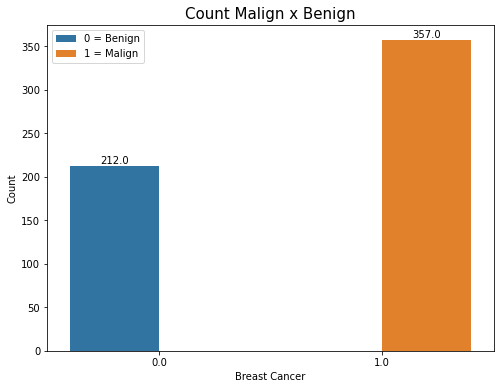

In [19]:
plt.figure(figsize = (8, 6))
plt.title("Count Malign x Benign", fontsize = 15)
ax = sns.countplot(df["label"], hue = df["label"])
gc.annotate_graph(ax)

plt.xlabel("Breast Cancer", fontsize = 10)
plt.ylabel("Count", fontsize = 10)
plt.legend(["0 = Benign", "1 = Malign"]);

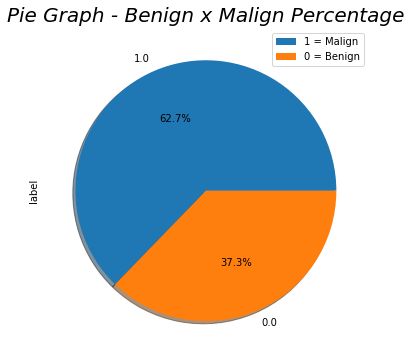

In [20]:
count = df["label"].value_counts()

plt.figure(figsize = (7, 6))
ax = count.plot(kind = "pie", rot = 0, autopct = "%1.1f%%",
              shadow = True)

ax.set_title("Pie Graph - Benign x Malign Percentage", 
             fontsize = 20, 
             fontstyle = "italic")

plt.legend(["1 = Malign", "0 = Benign"])
plt.show()

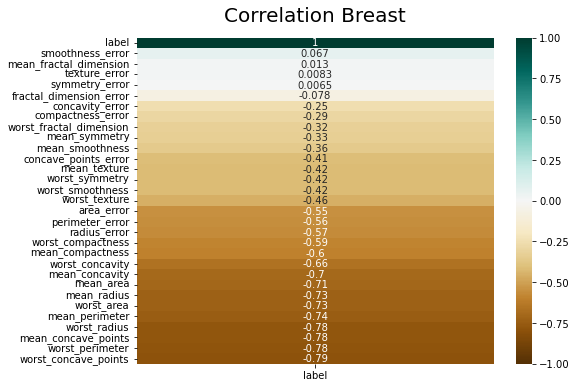

In [21]:
gc.rank_corr(df, title = "Correlation Breast", plt = plt, sns = sns, feature_corr = "label") #without normalized data

#A partir dos graficos plotados acima, podemos identificar que 67% dos tipos de cancer são Malignos, e que há pouca correlação entre as features com o label que desejamos prever.

---

#preparing, scaling and processing data to pca

In [22]:
data = df.drop(columns = ["label"])
labels = df["label"]

In [23]:
data.shape

(569, 30)

In [24]:
labels.shape

(569,)

In [25]:
scaler = StandardScaler()

data_scaled = scaler.fit_transform(data)

In [26]:
data_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [27]:
n_components = 5
pca = PCA(n_components = n_components)

In [28]:
data_pca_scaled = pca.fit_transform(data_scaled)

In [29]:
data_pca_scaled

array([[ 9.19283683,  1.94858312, -1.12316579,  3.63372952, -1.19511482],
       [ 2.3878018 , -3.76817176, -0.52929299,  1.11826466,  0.6217781 ],
       [ 5.73389628, -1.0751738 , -0.55174749,  0.91208269, -0.17708634],
       ...,
       [ 1.25617928, -1.90229672,  0.5627304 , -2.08922679,  1.80999253],
       [10.37479406,  1.67201011, -1.8770294 , -2.35603125, -0.03374139],
       [-5.4752433 , -0.67063676,  1.49044334, -2.29915816, -0.18470688]])

In [30]:
data_pca = pd.DataFrame(data_pca_scaled,
                      columns = [str(i + 1) + "º Componente" for i in range(n_components)])

In [31]:
data_pca

,1º Componente,2º Componente,3º Componente,4º Componente,5º Componente
0,9.192837,1.948583,-1.123166,3.633730,-1.195115
1,2.387802,-3.768172,-0.529293,1.118265,0.621778
2,5.733896,-1.075174,-0.551747,0.912083,-0.177086
3,7.122953,10.275589,-3.232789,0.152547,-2.960879
4,3.935302,-1.948072,1.389767,2.940640,0.546749
...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074824
565,3.793382,-3.584048,2.088476,-2.506028,-0.510722
566,1.256179,-1.902297,0.562730,-2.089227,1.809993
567,10.374794,1.672010,-1.877029,-2.356031,-0.033741


In [32]:
lista_pca = pca.explained_variance_ratio_
i = 0
for value in lista_pca:
    i += value

print(f"{i:.2%}")

84.73%


<function matplotlib.pyplot.show(close=None, block=None)>

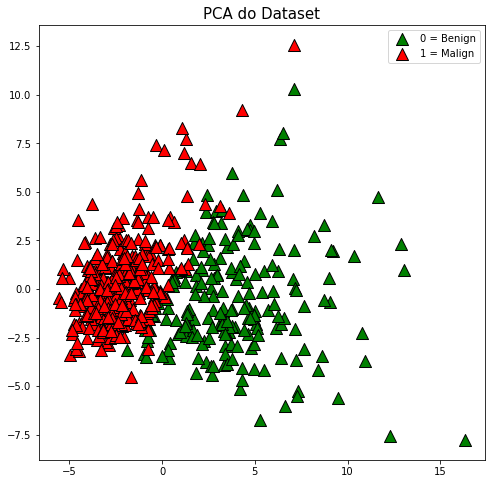

In [33]:
plt.figure(figsize = (8, 8))
plt.title("PCA do Dataset", fontsize = 15)
targets = [0, 1]
cores = ["g", "r"]

for t, c in zip(targets, cores):
    index = df["label"] == t
    plt.scatter(data_pca.loc[index, "1º Componente"],
                data_pca.loc[index, "2º Componente"],
                c = c,
                label = t,
                marker = "^",
                s = 145,
                edgecolors = "black")
                
plt.legend(["0 = Benign", "1 = Malign"])
plt.show

In [34]:
data_pca

,1º Componente,2º Componente,3º Componente,4º Componente,5º Componente
0,9.192837,1.948583,-1.123166,3.633730,-1.195115
1,2.387802,-3.768172,-0.529293,1.118265,0.621778
2,5.733896,-1.075174,-0.551747,0.912083,-0.177086
3,7.122953,10.275589,-3.232789,0.152547,-2.960879
4,3.935302,-1.948072,1.389767,2.940640,0.546749
...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074824
565,3.793382,-3.584048,2.088476,-2.506028,-0.510722
566,1.256179,-1.902297,0.562730,-2.089227,1.809993
567,10.374794,1.672010,-1.877029,-2.356031,-0.033741


In [35]:
labels

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
564    0.0
565    0.0
566    0.0
567    0.0
568    1.0
Name: label, Length: 569, dtype: float64

#train test split

In [36]:
x_train, x_test, y_train, y_test = train_test_split(data_pca, labels, test_size = 0.2, random_state = 42)

In [37]:
x_train

,1º Componente,2º Componente,3º Componente,4º Componente,5º Componente
68,4.330003,9.202526,1.492963,0.319948,4.728173
181,9.007166,0.581031,-3.134715,-0.862269,0.045722
63,-2.314132,3.267990,2.796224,0.565726,-0.381834
248,-2.582556,0.729213,-0.548143,-2.332079,-1.835267
60,-2.385836,2.757658,1.214085,1.794490,-3.338154
...,...,...,...,...,...
71,-0.307856,7.387812,3.819086,2.133554,2.710696
106,-0.749271,1.797639,-0.568366,-0.560499,-0.933096
270,-4.506563,-3.169273,-0.188062,0.391160,1.385207
435,0.664441,0.436861,-2.680782,-0.729227,-0.027788


In [38]:
x_test

,1º Componente,2º Componente,3º Componente,4º Componente,5º Componente
204,-0.781190,0.652849,-0.643657,0.214468,-0.437680
70,2.704596,-4.437142,0.307345,0.488692,0.372494
131,1.432069,-1.049604,-1.262011,0.533189,-0.626697
431,-0.915804,2.479013,0.362607,0.261967,0.138472
540,-1.665475,2.389618,1.502250,0.875951,0.484545
...,...,...,...,...,...
486,-2.284331,-2.466841,-0.821188,-0.040803,1.092780
75,1.428168,-1.967101,1.111939,0.752911,-0.539882
249,-2.485883,0.460596,-0.598920,0.998718,-0.430324
238,-0.681769,-1.135991,1.233667,-3.864500,1.428351


In [39]:
y_train

68     1.0
181    0.0
63     1.0
248    1.0
60     1.0
      ... 
71     1.0
106    1.0
270    1.0
435    0.0
102    1.0
Name: label, Length: 455, dtype: float64

In [40]:
y_test

204    1.0
70     0.0
131    0.0
431    1.0
540    1.0
      ... 
486    1.0
75     0.0
249    1.0
238    1.0
265    0.0
Name: label, Length: 114, dtype: float64

#classification models (Logistic Regression, KNN, and SVC)

In [41]:
model_log = LR()
model_log.fit(x_train, y_train)
y_pred_log = model_log.predict(x_test)
model_log.score(x_train, y_train)
print(f"Acurácia: {metrics.accuracy_score(y_test, y_pred_log)}")
print()
print(f"CR: {metrics.classification_report(y_test, y_pred_log)}\n")

Acurácia: 0.9824561403508771

CR:               precision    recall  f1-score   support

         0.0       0.98      0.98      0.98        43
         1.0       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114




In [42]:
model_svc = SVC(kernel = "linear")
model_svc.fit(x_train, y_train)
y_pred_svc = model_svc.predict(x_test)
model_svc.score(x_train, y_train)
print(f"Acurácia: {metrics.accuracy_score(y_test, y_pred_svc)}")
print()
print(f"CR: {metrics.classification_report(y_test, y_pred_svc)}\n")

Acurácia: 0.9824561403508771

CR:               precision    recall  f1-score   support

         0.0       0.98      0.98      0.98        43
         1.0       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114




In [43]:
model_knn = KNN(n_neighbors = 10)
model_knn.fit(x_train, y_train)
y_pred_knn = model_knn.predict(x_test)
model_knn.score(x_train, y_train)
print(f"Acurácia: {metrics.accuracy_score(y_test, y_pred_knn)}")
print()
print(f"CR: {metrics.classification_report(y_test, y_pred_knn)}\n")

Acurácia: 0.9649122807017544

CR:               precision    recall  f1-score   support

         0.0       0.95      0.95      0.95        43
         1.0       0.97      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114




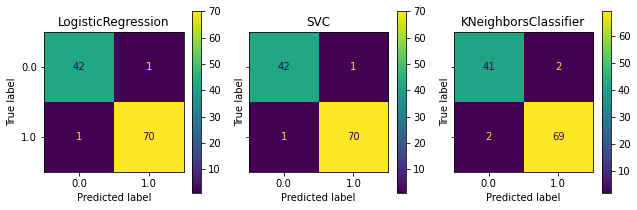

In [44]:
models = [model_log, model_svc, model_knn]

fig, axs = plt.subplots(1, 3, figsize = (9,3), sharey = True)

for model, ax in zip(models, axs.flatten()):
    metrics.plot_confusion_matrix(model, x_test, y_test, ax = ax)
    ax.title.set_text(type(model).__name__)
    # plt.title(f"Model: {model}");

plt.tight_layout()  
plt.show()

#Conclusão:

Podemos identificar que os modelos de Logistic Regression e SVC, apresentam metricas muito boas para ser verdade(rsrsrs), já o modelo de Kneighbors, apresenta uma melhor metrica, ja que há um tanto pequeno de erros!!!

In [45]:
#using pipeline

In [46]:
# knc = NearestCentroid()
# tree = tree.DecisionTreeClassifier()

In [47]:
# pipeline = Pipeline([('knc', knc), ('tree', tree)])

In [48]:
# pipeline.fit(x_train, y_train)

#tive problemas em executar essa parte do codigo, mas não tem problema, era um adicional rsrs, obrigado professor!!!!